### Drivendata.org - Earthquake Competiton
#### Exploratory Data Analysis

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [173]:
labelspath = "../data/train_labels.csv"
valuespath = "../data/train_values.csv"
testvalues = "../data/test_values.csv"

In [174]:
values = pd.read_csv(valuespath)
labels = pd.read_csv(labelspath)
df = pd.merge(left=values, right=labels, how="left", on="building_id")
df.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2


In [182]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

### Geographic region and earthquakes
geo_level_1_id -> Largest geographic region (0-30)

geo_level_2_id -> Medium-level geographic region (0-1247)

geo_level_3_id -> Small-level geographic region (0-12567)

In [196]:
temp = df[['geo_level_1_id', 'damage_grade']]
temp['cc'] = 1
temp.groupby(['geo_level_1_id', 'damage_grade']).agg("count")

<ipython-input-196-c37a9c791125>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['cc'] = 1


cc
geo_level_1_id damage_grade      
0              1              337
               2             3075
               3              599
1              1              411
               2             1985
...                           ...
29             2              349
               3               39
30             1              252
               2             2127
               3              307

[92 rows x 1 columns]

<AxesSubplot:ylabel='geo_level_1_id'>

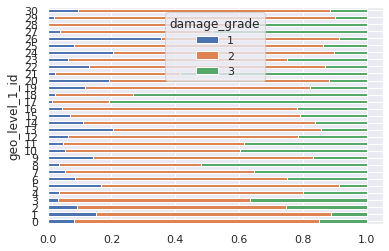

In [200]:
df.groupby('geo_level_1_id')['damage_grade'].value_counts(normalize=True).unstack().plot(kind="barh", stacked=True)

### Simple metric to calculate the total risk for grade 1, 2 and 3 based on geo_level_1 - 3

In [338]:
geo_level_1_risks = df.groupby("geo_level_1_id")["damage_grade"].value_counts(normalize=True).unstack()
geo_level_2_risks = df.groupby("geo_level_2_id")["damage_grade"].value_counts(normalize=True).unstack()
geo_level_3_risks = df.groupby("geo_level_3_id")["damage_grade"].value_counts(normalize=True).unstack()

In [332]:
test.iat[0, 0]

0.08401894789329345

In [334]:
test.shape

(31, 3)

In [339]:
import joblib
joblib.dump(geo_level_1_risks, "../data/geo_level_1_risks.pkl")
joblib.dump(geo_level_2_risks, "../data/geo_level_2_risks.pkl")
joblib.dump(geo_level_3_risks, "../data/geo_level_3_risks.pkl")

['../data/geo_level_3_risks.pkl']

In [201]:
# Create three new features based on geo_level_(1-3)_id and create a low or high risk level based
# on the damage grade
df.groupby("geo_level_1_id")["damage_grade"].value_counts(normalize=True)

geo_level_1_id  damage_grade
0               2               0.766642
                3               0.149339
                1               0.084019
1               2               0.734913
                1               0.152166
                                  ...   
29              3               0.098485
                1               0.020202
30              2               0.791884
                3               0.114296
                1               0.093820
Name: damage_grade, Length: 92, dtype: float64

## Start work with geo_level_x_id_damage_grade_y, where x = [1,3] and y = [1,3]

In [222]:
tt = df.groupby("geo_level_1_id")["damage_grade"].value_counts(normalize=True)
grade_3 = tt[tt.index.get_level_values('damage_grade') == 3]
grade_2 = tt[tt.index.get_level_values('damage_grade') == 2]
grade_1 = tt[tt.index.get_level_values('damage_grade') == 1]

Text(0.5, 1.0, 'Density of Grade 3 damage')

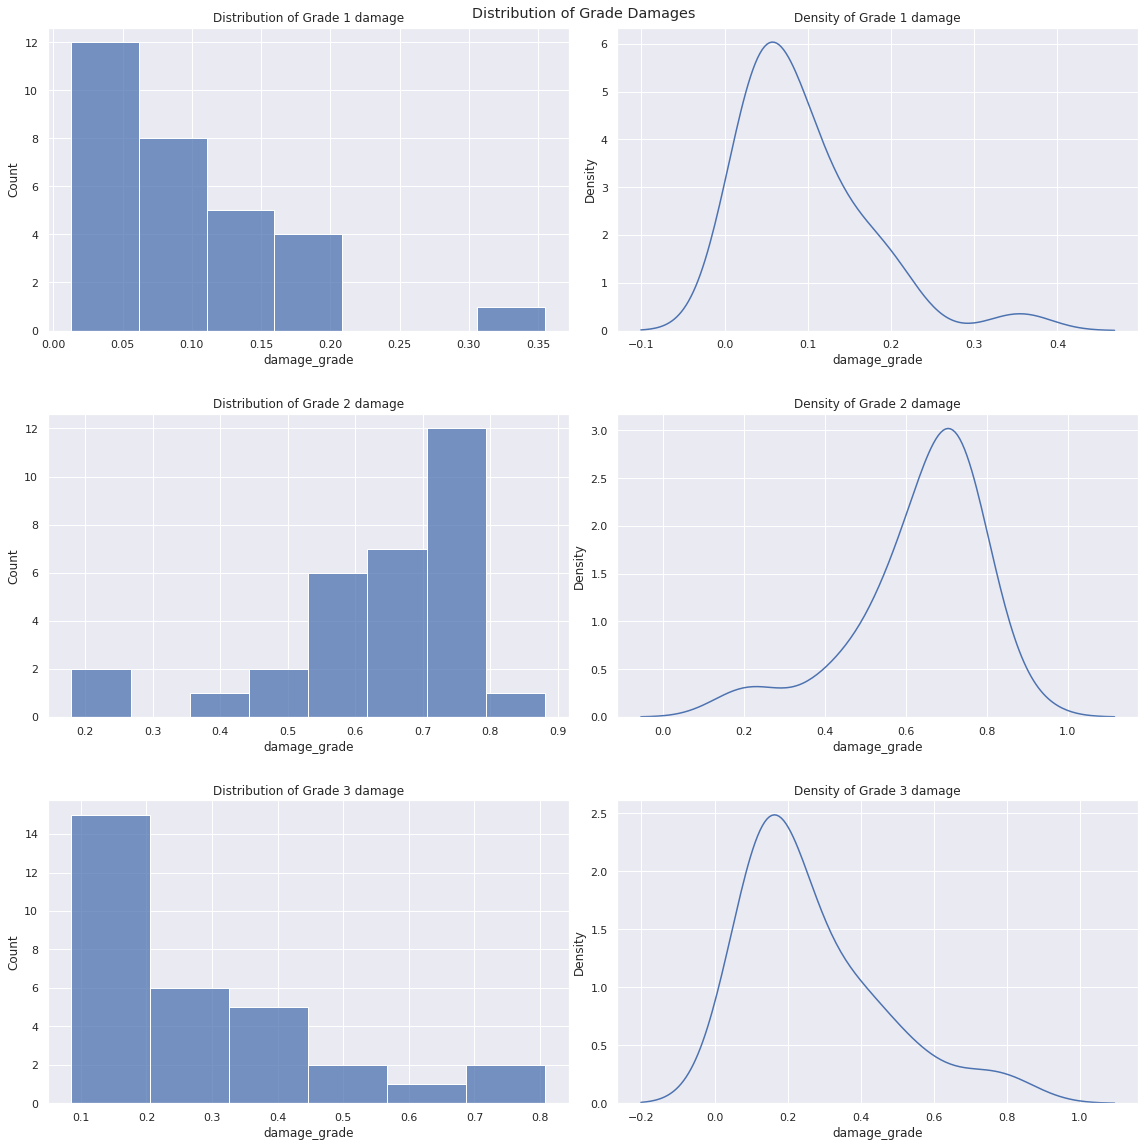

In [247]:
fig, ax = plt.subplots(3, 2, figsize=(16,16))
fig.suptitle("Distribution of Grade Damages")
fig.tight_layout(h_pad=5)
sns.histplot(data=grade_1, ax=ax[0][0])
ax[0][0].set_title("Distribution of Grade 1 damage")
sns.kdeplot(data=grade_1, ax=ax[0][1])
ax[0][1].set_title("Density of Grade 1 damage")
sns.histplot(data=grade_2, ax=ax[1][0])
ax[1][0].set_title("Distribution of Grade 2 damage")
sns.kdeplot(data=grade_2, ax=ax[1][1])
ax[1][1].set_title("Density of Grade 2 damage")
sns.histplot(data=grade_3, ax=ax[2][0])
ax[2][0].set_title("Distribution of Grade 3 damage")
sns.kdeplot(data=grade_3, ax=ax[2][1])
ax[2][1].set_title("Density of Grade 3 damage")

### Summary of geo_level_1_id and damage_grade
- Grade 1: 10%
- Grade 2: 60%
- Grade 3: 40%

## Geo_level_id_2

In [249]:
tt = df.groupby("geo_level_2_id")["damage_grade"].value_counts(normalize=True)
grade_3 = tt[tt.index.get_level_values('damage_grade') == 3]
grade_2 = tt[tt.index.get_level_values('damage_grade') == 2]
grade_1 = tt[tt.index.get_level_values('damage_grade') == 1]

Text(0.5, 1.0, 'Density of Grade 3 damage')

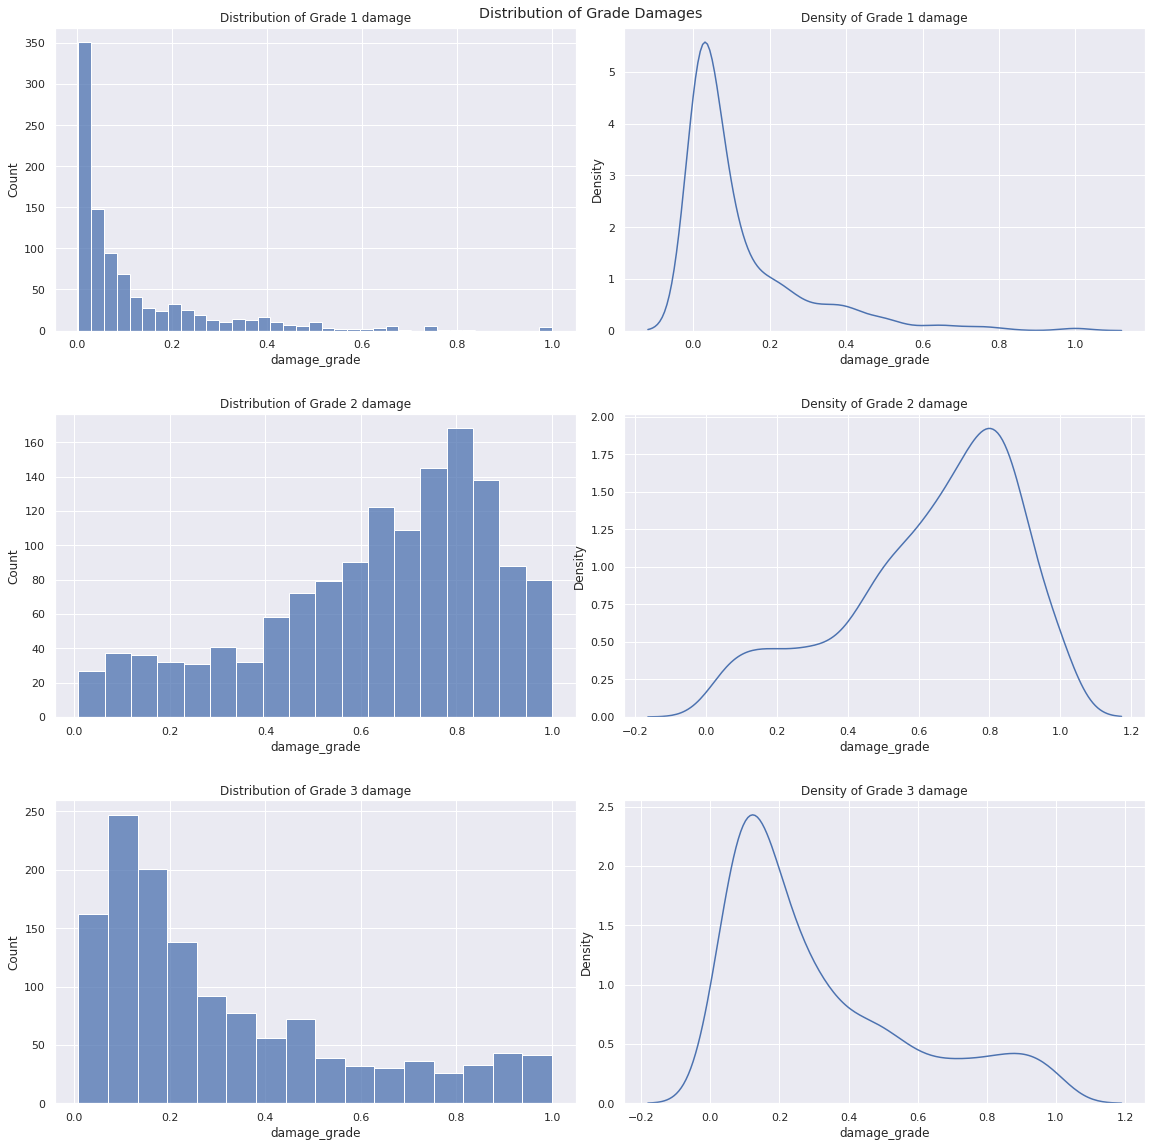

In [250]:
fig, ax = plt.subplots(3, 2, figsize=(16,16))
fig.suptitle("Distribution of Grade Damages")
fig.tight_layout(h_pad=5)
sns.histplot(data=grade_1, ax=ax[0][0])
ax[0][0].set_title("Distribution of Grade 1 damage")
sns.kdeplot(data=grade_1, ax=ax[0][1])
ax[0][1].set_title("Density of Grade 1 damage")
sns.histplot(data=grade_2, ax=ax[1][0])
ax[1][0].set_title("Distribution of Grade 2 damage")
sns.kdeplot(data=grade_2, ax=ax[1][1])
ax[1][1].set_title("Density of Grade 2 damage")
sns.histplot(data=grade_3, ax=ax[2][0])
ax[2][0].set_title("Distribution of Grade 3 damage")
sns.kdeplot(data=grade_3, ax=ax[2][1])
ax[2][1].set_title("Density of Grade 3 damage")

### Summary of geo_level_2_id and damage_grade
We see clear dividers in all damage grade levels, and recommend the following:
- Grade 1: 20%
- Grade 2: 60%
- Grade 3: 25%

## Geo_level_id_3

In [251]:
tt = df.groupby("geo_level_3_id")["damage_grade"].value_counts(normalize=True)
grade_3 = tt[tt.index.get_level_values('damage_grade') == 3]
grade_2 = tt[tt.index.get_level_values('damage_grade') == 2]
grade_1 = tt[tt.index.get_level_values('damage_grade') == 1]

Text(0.5, 1.0, 'Density of Grade 3 damage')

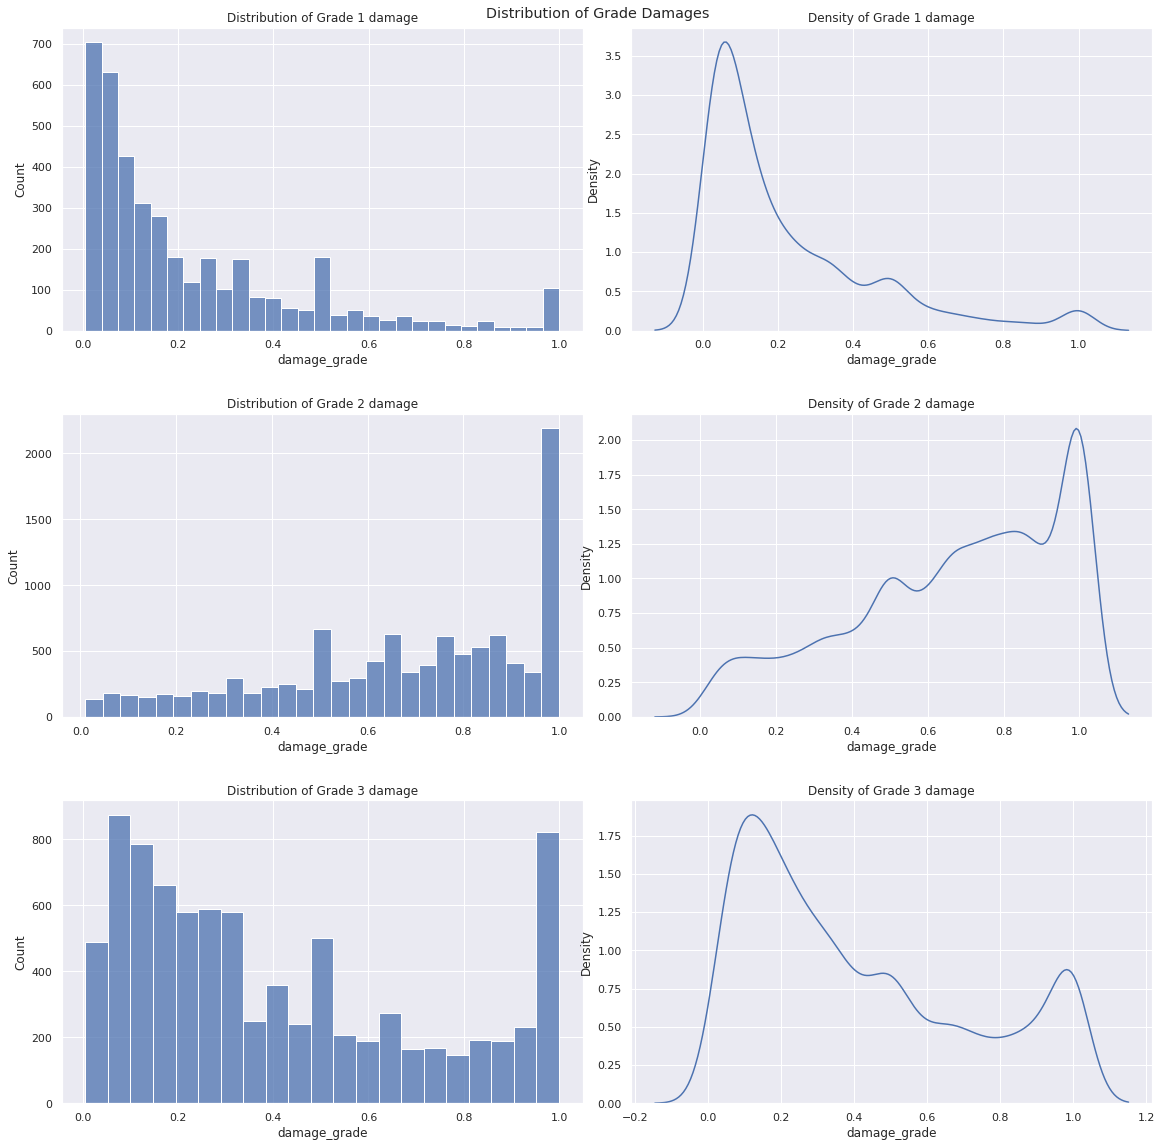

In [252]:
fig, ax = plt.subplots(3, 2, figsize=(16,16))
fig.suptitle("Distribution of Grade Damages")
fig.tight_layout(h_pad=5)
sns.histplot(data=grade_1, ax=ax[0][0])
ax[0][0].set_title("Distribution of Grade 1 damage")
sns.kdeplot(data=grade_1, ax=ax[0][1])
ax[0][1].set_title("Density of Grade 1 damage")
sns.histplot(data=grade_2, ax=ax[1][0])
ax[1][0].set_title("Distribution of Grade 2 damage")
sns.kdeplot(data=grade_2, ax=ax[1][1])
ax[1][1].set_title("Density of Grade 2 damage")
sns.histplot(data=grade_3, ax=ax[2][0])
ax[2][0].set_title("Distribution of Grade 3 damage")
sns.kdeplot(data=grade_3, ax=ax[2][1])
ax[2][1].set_title("Density of Grade 3 damage")

### Idea: Create nine new features based on grade 1 - 3 and geo_location_id 1 - 3
|building_id|geo_level_1_grade_1|geo_level_1_grade_2| ... | geo_level_3_grade_3 |
|---|---|---|---|---|
|123| 1|0|...|1|

In [312]:
def create_geo_dicts(data, geo_level, grade_thresholds):
    temp_dicts = [dict(), dict(), dict()] 
    for j, key in enumerate(grade_thresholds):
        tt = data.groupby(geo_level)["damage_grade"].value_counts(normalize=True)
        tt = tt[tt.index.get_level_values("damage_grade") == j+1]
        #print(tt)
        for i, val in enumerate(tt):
            loc_id, _ = tt.index[i]
            #print(loc_id, val)
            temp_dicts[j][loc_id] = 1 if val >= grade_thresholds[key] else 0
            
    return temp_dicts

grade_thresholds_lvl_1 ={
    "grade_1": 0.1,
    "grade_2": 0.6,
    "grade_3": 0.4
}
grade_thresholds_lvl_2 ={
    "grade_1": 0.2,
    "grade_2": 0.6,
    "grade_3": 0.25
}

grade_thresholds_lvl_3 ={
    "grade_1": 0.2,
    "grade_2": 0.4,
    "grade_3": 0.6
}

geo_level_1 = create_geo_dicts(df, "geo_level_1_id", grade_thresholds_lvl_1)
geo_level_2 = create_geo_dicts(df, "geo_level_2_id", grade_thresholds_lvl_2)
geo_level_3 = create_geo_dicts(df, "geo_level_3_id", grade_thresholds_lvl_3)

In [318]:
import joblib
joblib.dump(geo_level_1, "../data/geo_level_1.pkl")
joblib.dump(geo_level_2, "../data/geo_level_2.pkl")
joblib.dump(geo_level_3, "../data/geo_level_3.pkl")

['../data/geo_level_3.pkl']

In [319]:
geo_level_1

[{0: 0,
  1: 1,
  2: 0,
  3: 0,
  4: 0,
  5: 1,
  6: 0,
  7: 0,
  8: 0,
  9: 1,
  10: 0,
  11: 0,
  12: 0,
  13: 1,
  14: 1,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 1,
  20: 1,
  21: 0,
  22: 1,
  23: 0,
  24: 1,
  25: 0,
  26: 1,
  27: 0,
  29: 0,
  30: 0},
 {0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 0,
  8: 0,
  9: 1,
  10: 0,
  11: 0,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 0,
  18: 0,
  19: 1,
  20: 1,
  21: 0,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 0,
  27: 0,
  28: 0,
  29: 1,
  30: 1},
 {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 1,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 1,
  18: 1,
  19: 0,
  20: 0,
  21: 1,
  22: 0,
  23: 0,
  24: 0,
  25: 0,
  26: 0,
  27: 1,
  28: 1,
  29: 0,
  30: 0}]

In [270]:
# Create the fact table which places a geo location in different risk categories per grade
grade_thresholds ={
    "1": 10,
    "2": 60,
    "3": 40
}
geo_level_1_grade_1 = dict()
asd = df.groupby("geo_level_1_id")["damage_grade"].value_counts(normalize=True)
asd = asd[asd.index.get_level_values('damage_grade') == 1]
for i, val in enumerate(asd):
    loc_id, _ = asd.index[i]
    geo_level_1grade_1[loc_id] = 1 if val >= 0.1 else 0


In [271]:
geo_grade_1

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 1,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 1,
 18: 1,
 19: 0,
 20: 0,
 21: 1,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 1,
 28: 1,
 29: 0,
 30: 0}

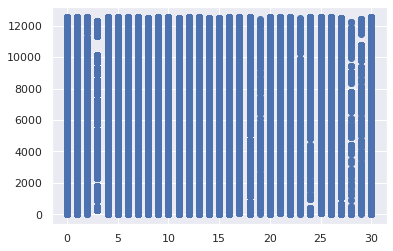

In [187]:
plt.scatter(x=df['geo_level_1_id'], y=df['geo_level_3_id'])

count_floors_pre_eq (type: **int**): number of floors in the building before the earthquake.

age (type: **int**): age of the building in years.

area_percentage (type: **int**): normalized area of the building footprint.

height_percentage (type: **int**): normalized height of the building footprint.

count_families (type: **int**): number of families that live in the building


In [33]:
int_cols = ['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families']

In [104]:
def plot_corr(data, dep, label):
    data.boxplot(column=dep, by=label)
    plt.title("Boxplot of {0} by {1}".format(dep, label))
    plt.suptitle("")
    plt.show()

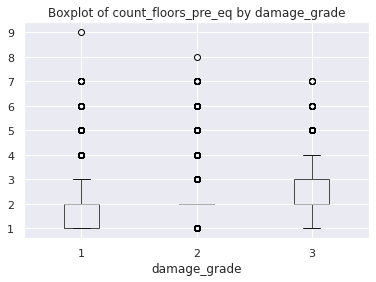

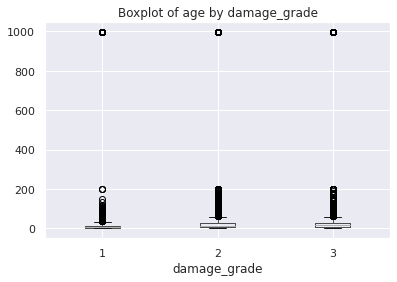

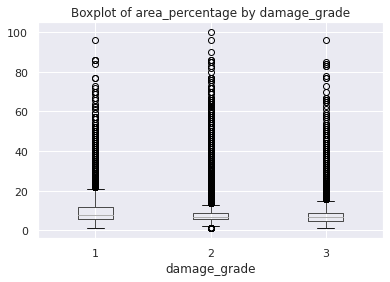

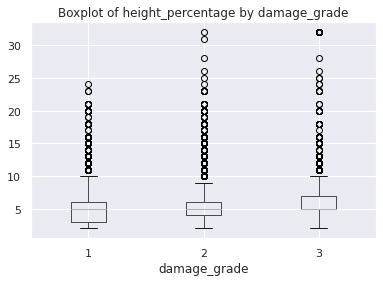

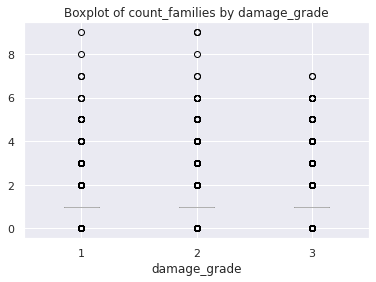

In [106]:
for col in int_cols:
    plot_corr(df, col, "damage_grade")

land_surface_condition (type: **categorical**): surface condition of the land where the building was built. Possible values: n, o, t.

foundation_type (type: **categorical**): type of foundation used while building. Possible values: h, i, r, u, w.

roof_type (type: **categorical**): type of roof used while building. Possible values: n, q, x.

ground_floor_type (type: **categorical**): type of the ground floor. Possible values: f, m, v, x, z.

other_floor_type (type: **categorical**): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.

position (type: **categorical**): position of the building. Possible values: j, o, s, t.

plan_configuration (type: **categorical**): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

legal_ownership_status (type: **categorical**): legal ownership status of the land where building was built. Possible values: a, r, v, w.


In [179]:
cat_cols = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
           'position', 'plan_configuration', 'legal_ownership_status']

In [108]:
dfc = df[cat_cols]

In [169]:
def plot_cat_corr(data, dep, label):
    df.groupby(dep)[label].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, legend=True)
    plt.title("{0} over {1}".format(dep, label))
    plt.xticks(rotation=90)

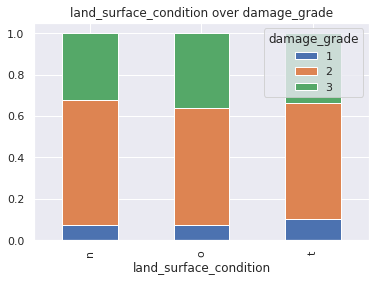

In [170]:
plot_cat_corr(df, "land_surface_condition", "damage_grade")

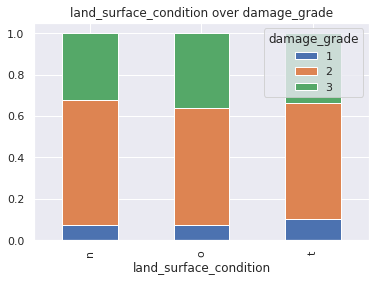

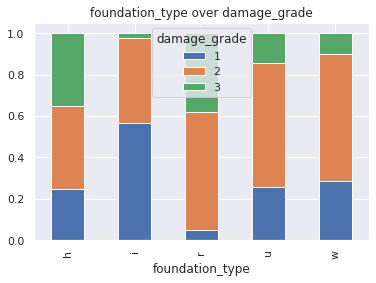

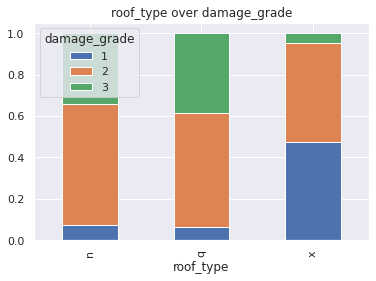

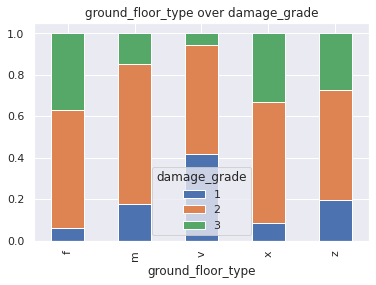

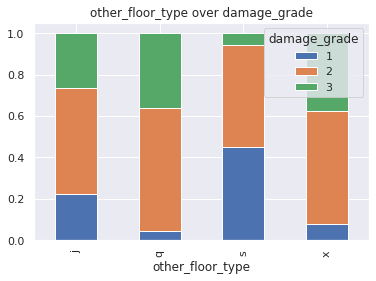

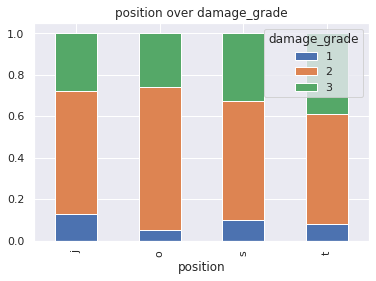

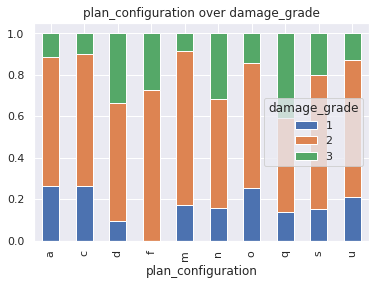

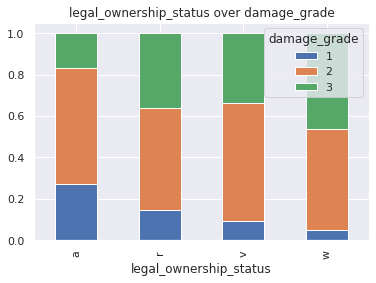

In [162]:
for col in cat_cols:
    plot_cat_corr(df, col, "damage_grade")

    has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
    has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
    has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
    has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
    has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
    has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
    has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
    has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
    has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
    has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
    has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.

    has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
    has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
    has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
    has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
    has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
    has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
    has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
    has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
    has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
    has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
    has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.


In [180]:
bin_cols = ["has_superstructure_adobe_mud", "has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag",
           "has_superstructure_cement_mortar_stone", "has_superstructure_mud_mortar_brick", "has_superstructure_cement_mortar_brick",
           "has_superstructure_timber", "has_superstructure_bamboo", "has_superstructure_rc_non_engineered", 
           "has_superstructure_rc_engineered", "has_superstructure_other", "has_secondary_use", "has_secondary_use_agriculture",
           "has_secondary_use_hotel", "has_secondary_use_rental", "has_secondary_use_institution", "has_secondary_use_school",
           "has_secondary_use_industry", "has_secondary_use_health_post", "has_secondary_use_gov_office", "has_secondary_use_use_police",
           "has_secondary_use_other"]

/home/chrolss/anaconda3/envs/machinelearning/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


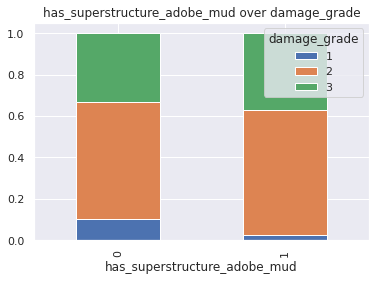

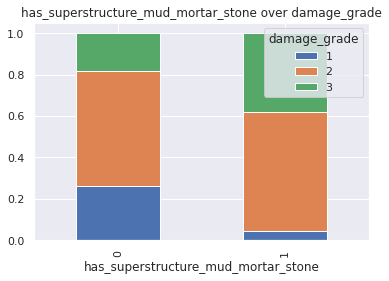

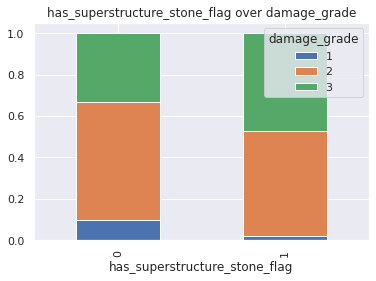

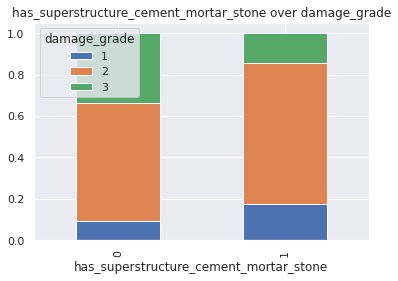

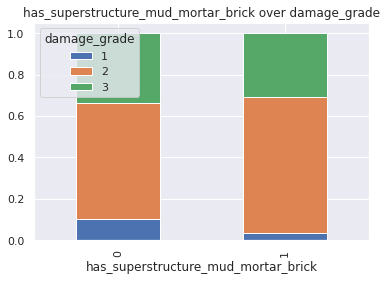

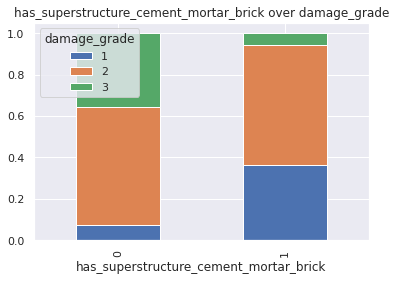

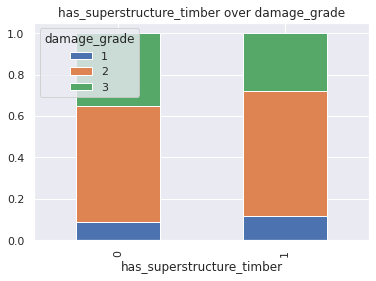

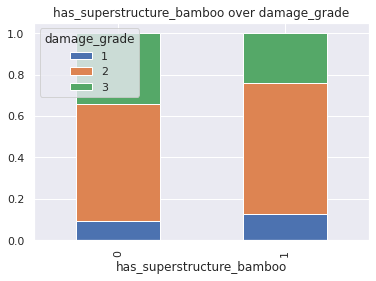

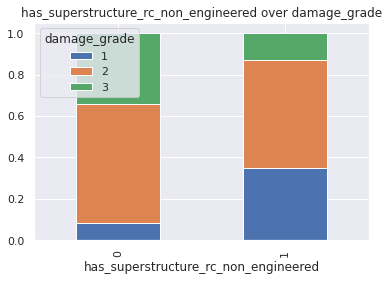

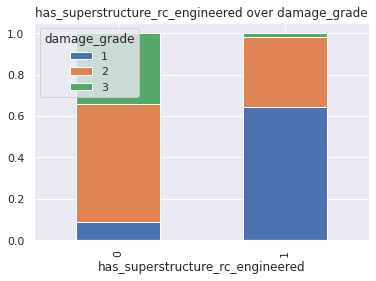

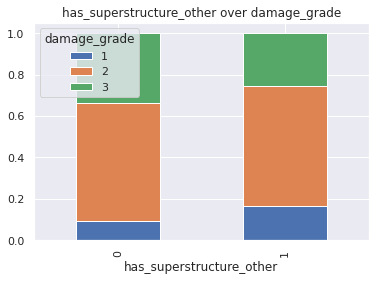

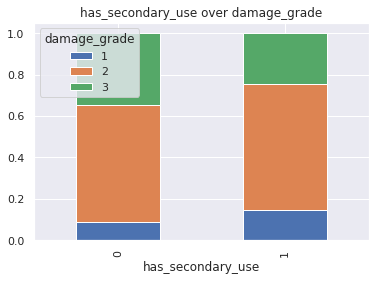

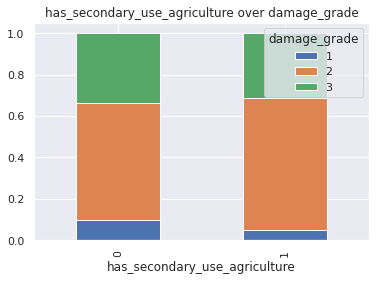

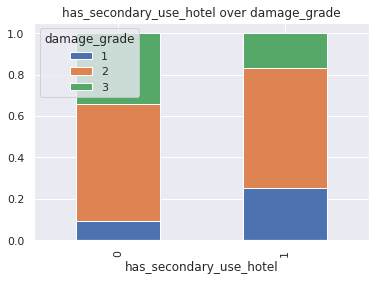

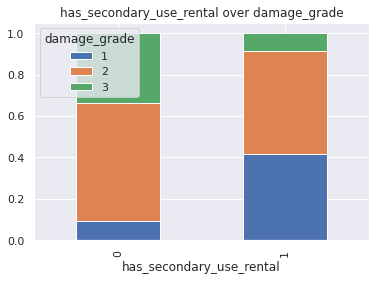

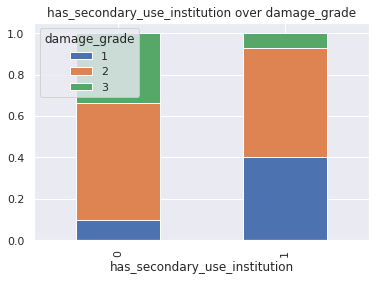

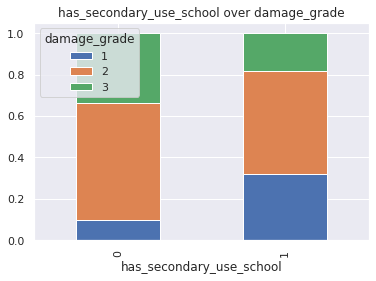

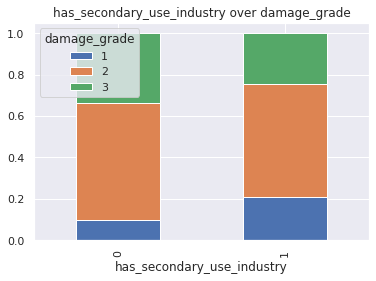

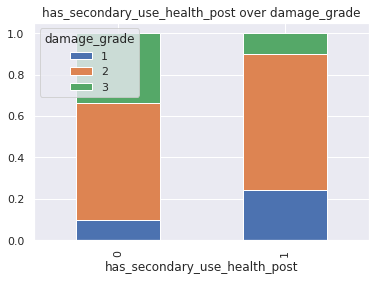

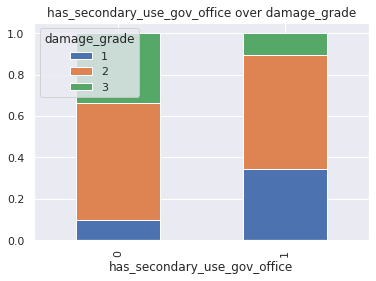

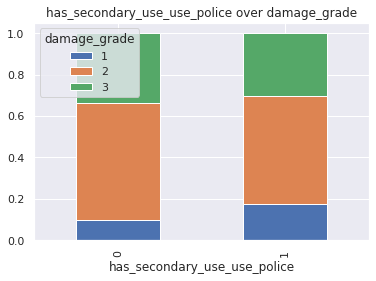

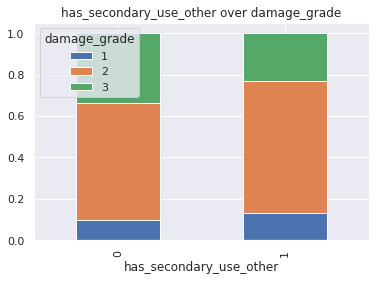

In [181]:
for col in bin_cols:
    plot_cat_corr(df, col, "damage_grade")